In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2.fisheye.CALIB_FIX_SKEW

# inner size of the chessboard
width = 9
height = 6
square_size = 0.025

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,6,0)
objp = np.zeros((width*height, 1, 3), np.float32)
objp[:, 0, :2] = np.mgrid[0:width, 0:height].T.reshape(-1, 2)

objp *= square_size

# Arrays to store object points and image points from all the images.
objpoints = []  # 3d point in real world space
imgpoints = []  # 2d points in image plane.

img_width = 640
img_height = 480
image_size = (img_width, img_height)

path = "mats/"
image_dir = path + "pairs/"

number_of_images = 50
for i in range(1, number_of_images):
    img = cv2.imread(image_dir + "left_%02d.png" % i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (width, height),cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

    Y, X, channels = img.shape
    # If found, add object points, image points (after refining them)
    if ret:
        minRx = corners[:, :, 0].min()
        maxRx = corners[:, :, 0].max()
        minRy = corners[:, :, 1].min()
        maxRy = corners[:, :, 1].max()

        border_threshold_x = X/12
        border_threshold_y = Y/12

        x_thresh_bad = False
        if minRx < border_threshold_x or maxRx > X - border_threshold_x:
            x_thresh_bad = True

        y_thresh_bad = False
        if minRy < border_threshold_y or maxRy > Y - border_threshold_y:
            y_thresh_bad = True

        if x_thresh_bad or y_thresh_bad:
            continue
        
    if ret:
      objpoints.append(objp)
      corners2 = cv2.cornerSubPix(gray, corners, (3, 3), (-1, -1), criteria)
      imgpoints.append(corners2)

      # Draw and display the corners
      cv2.drawChessboardCorners(img, (width, height), corners2, ret)
      cv2.imshow('Corners', img)
      cv2.waitKey(50)
    else:
      print("Could not find corners in image %d" % i)
      continue

cv2.destroyAllWindows()

Could not find corners in image 30


In [3]:
N_OK = len(objpoints)
K = np.zeros((3, 3))
D = np.zeros((4, 1))

rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]

ret,K, D, rvecs, tvecs = cv2.fisheye.calibrate(
    objpoints,
    imgpoints,
    image_size,
    K,
    D,
    rvecs,
    tvecs,
    calibration_flags,
    (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6)
)

map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, image_size, cv2.CV_16SC2)

Text(0.5, 1.0, 'Difference')

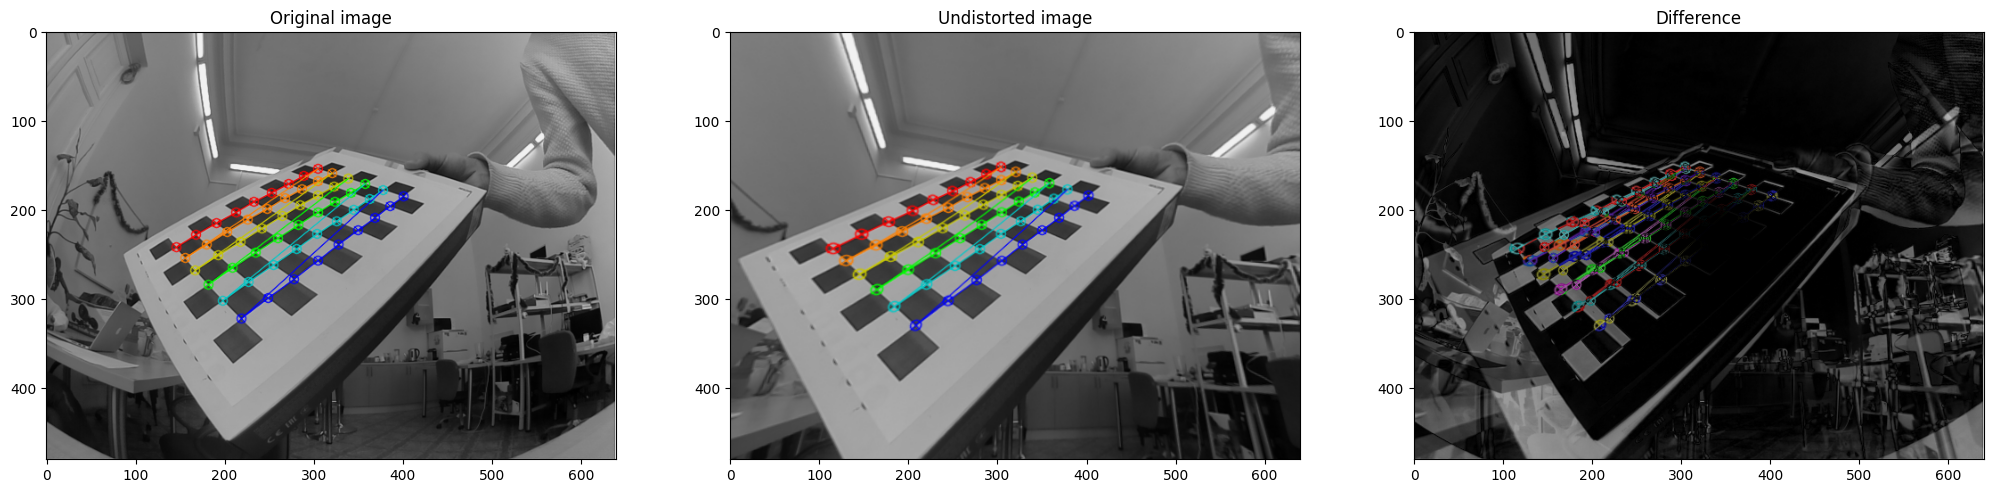

In [4]:
undistorted_image = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
diff = cv2.absdiff(img, undistorted_image)

plt.figure(figsize=(25, 12))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original image")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB))
plt.title("Undistorted image")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
plt.title("Difference")

In [5]:
# print camera parameters

print("K: ", K)
print("D: ", D)



K:  [[335.44708978   0.         345.42206916]
 [  0.         335.26836117 232.87147934]
 [  0.           0.           1.        ]]
D:  [[-0.02431571]
 [-0.01928764]
 [ 0.0295129 ]
 [-0.02036672]]


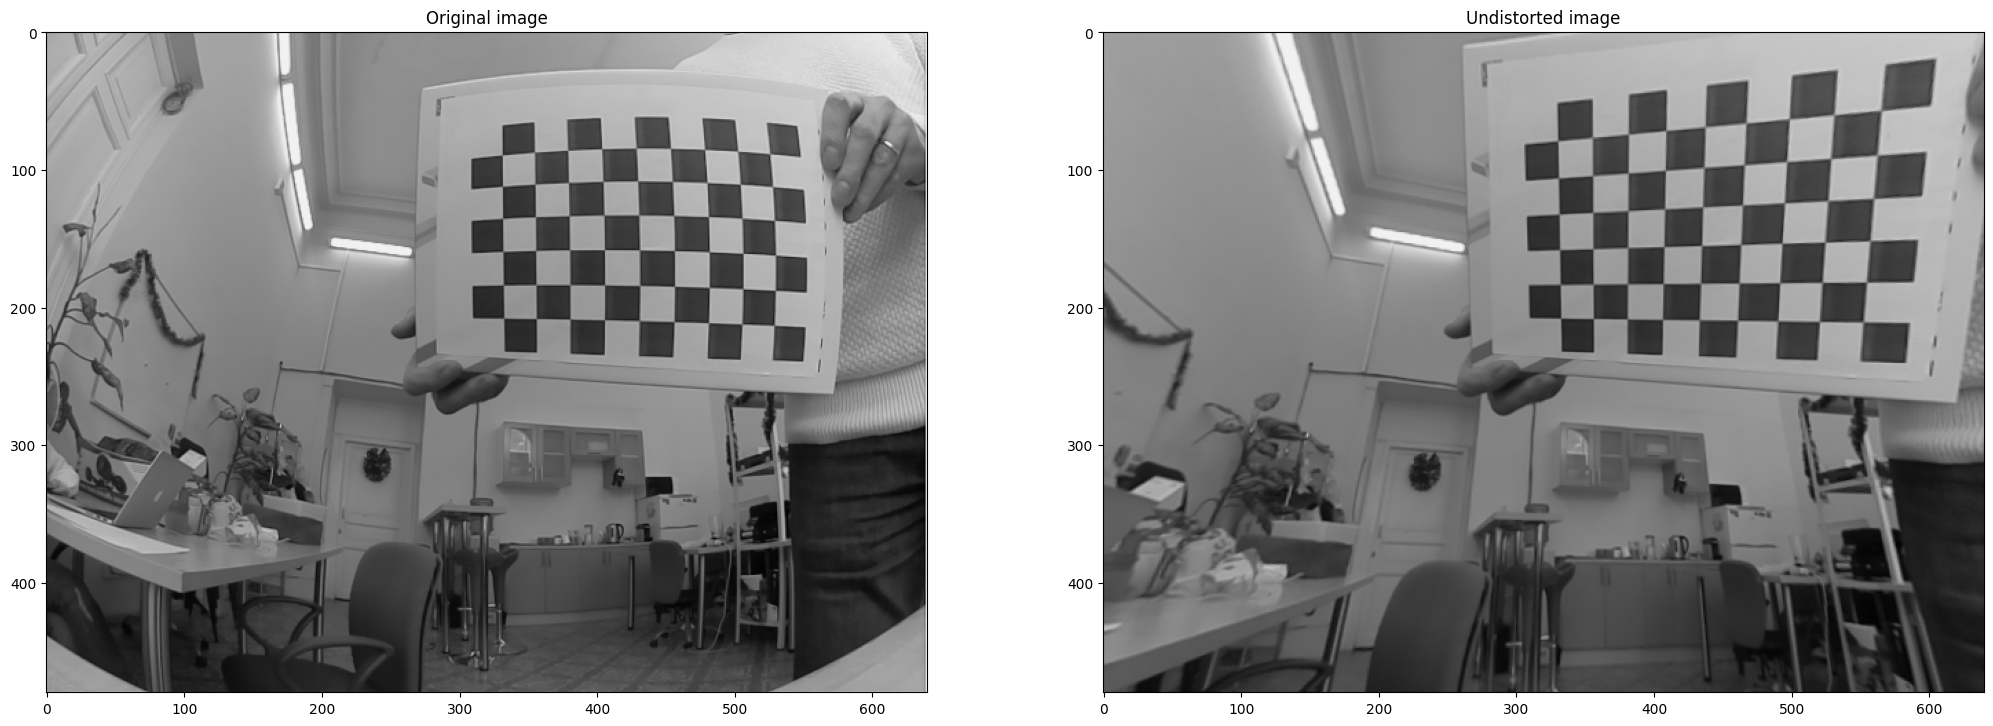

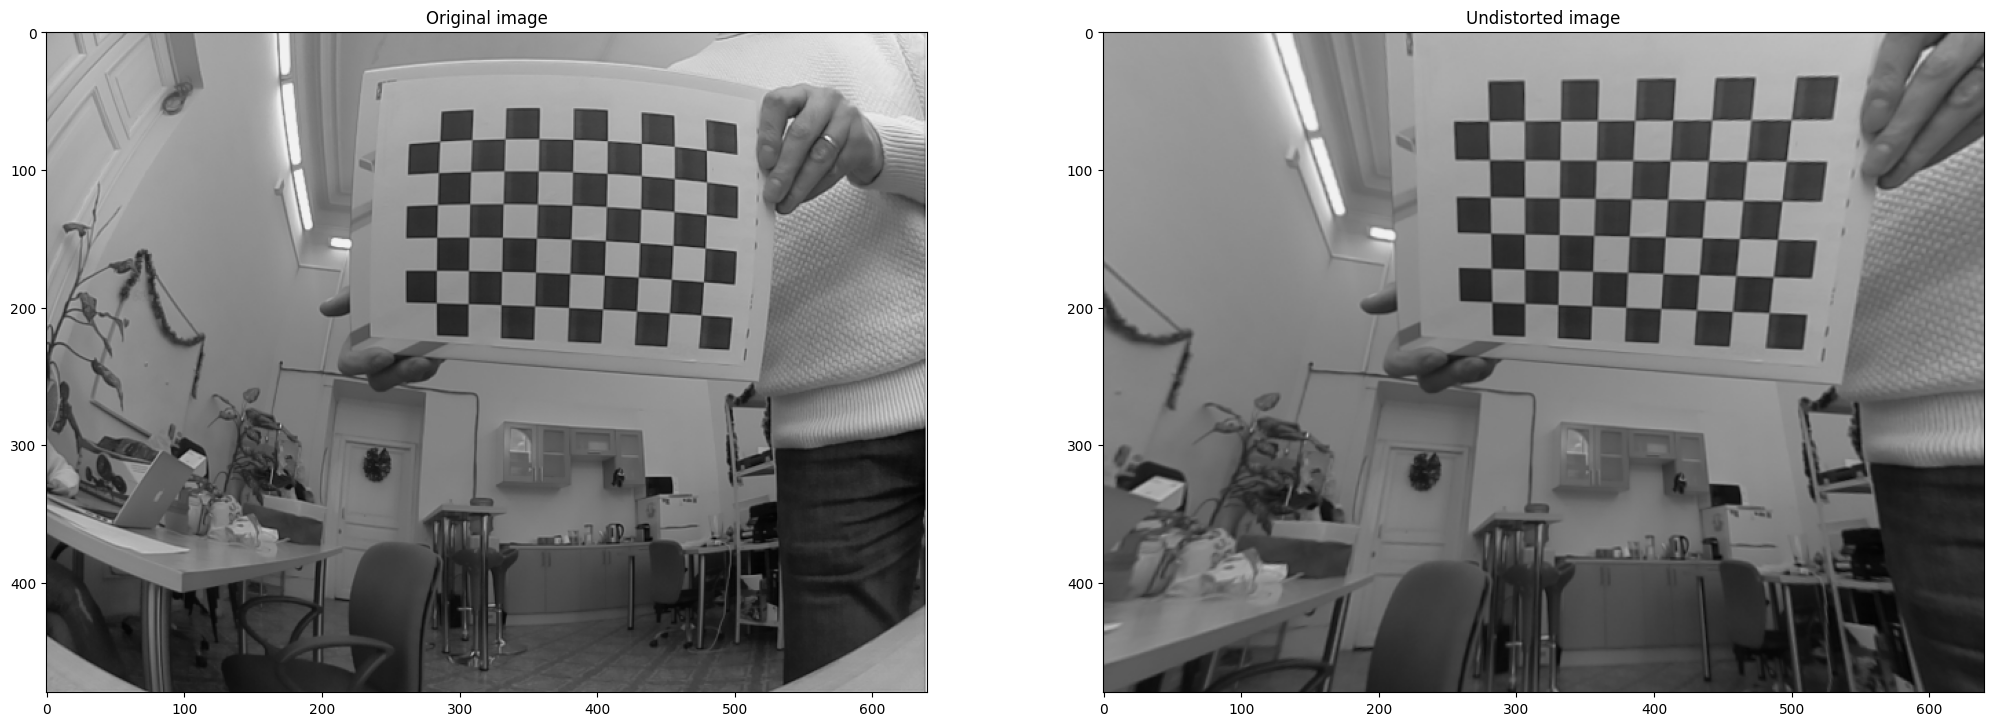

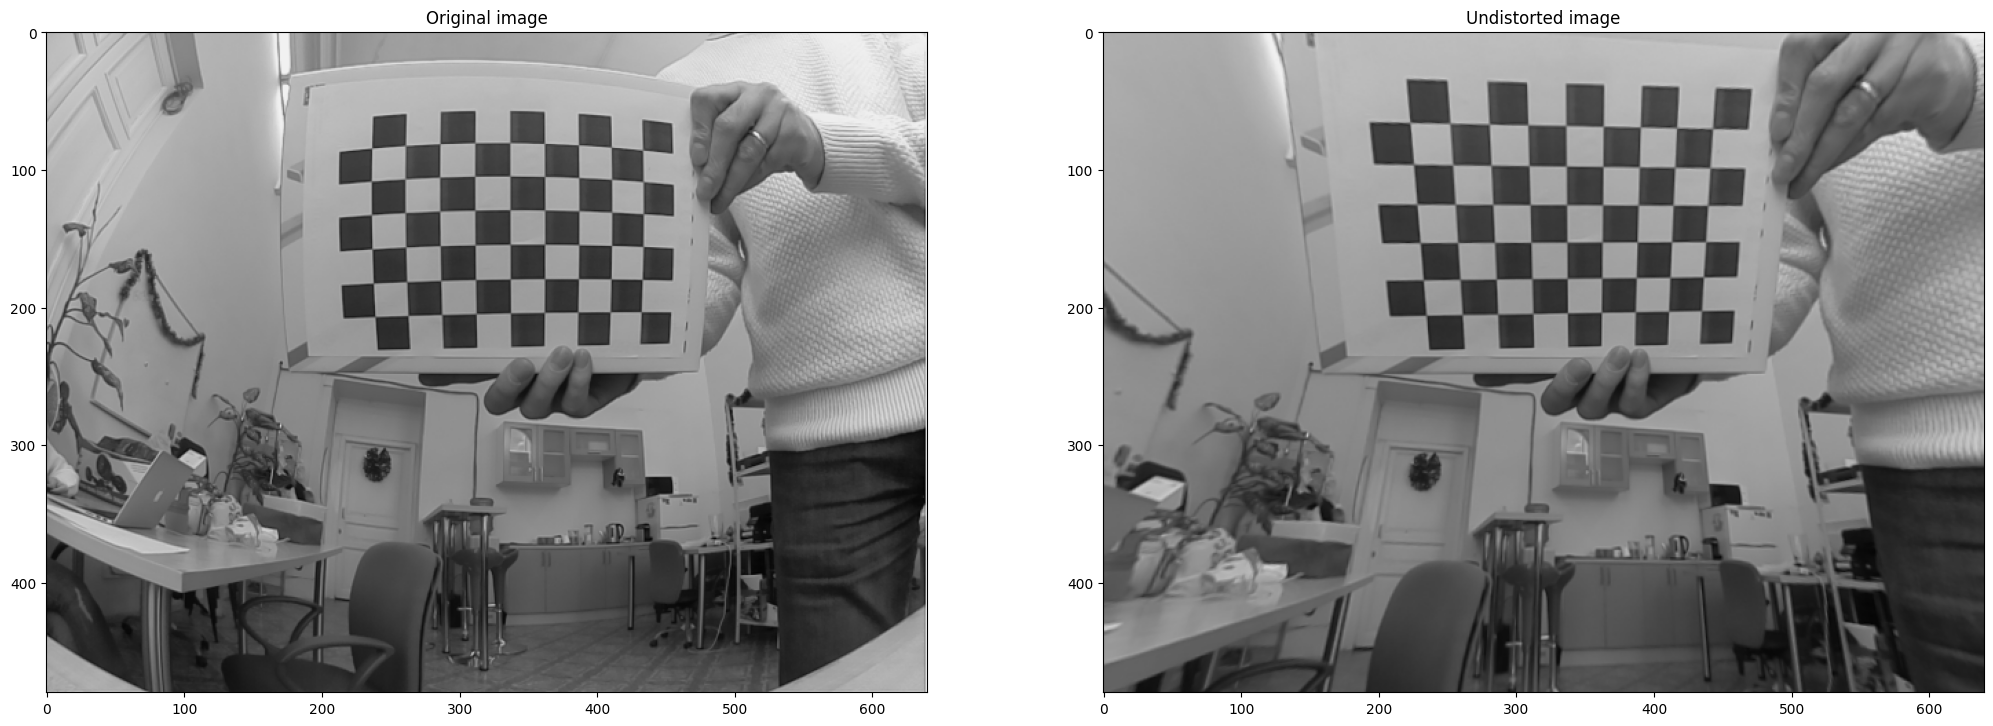

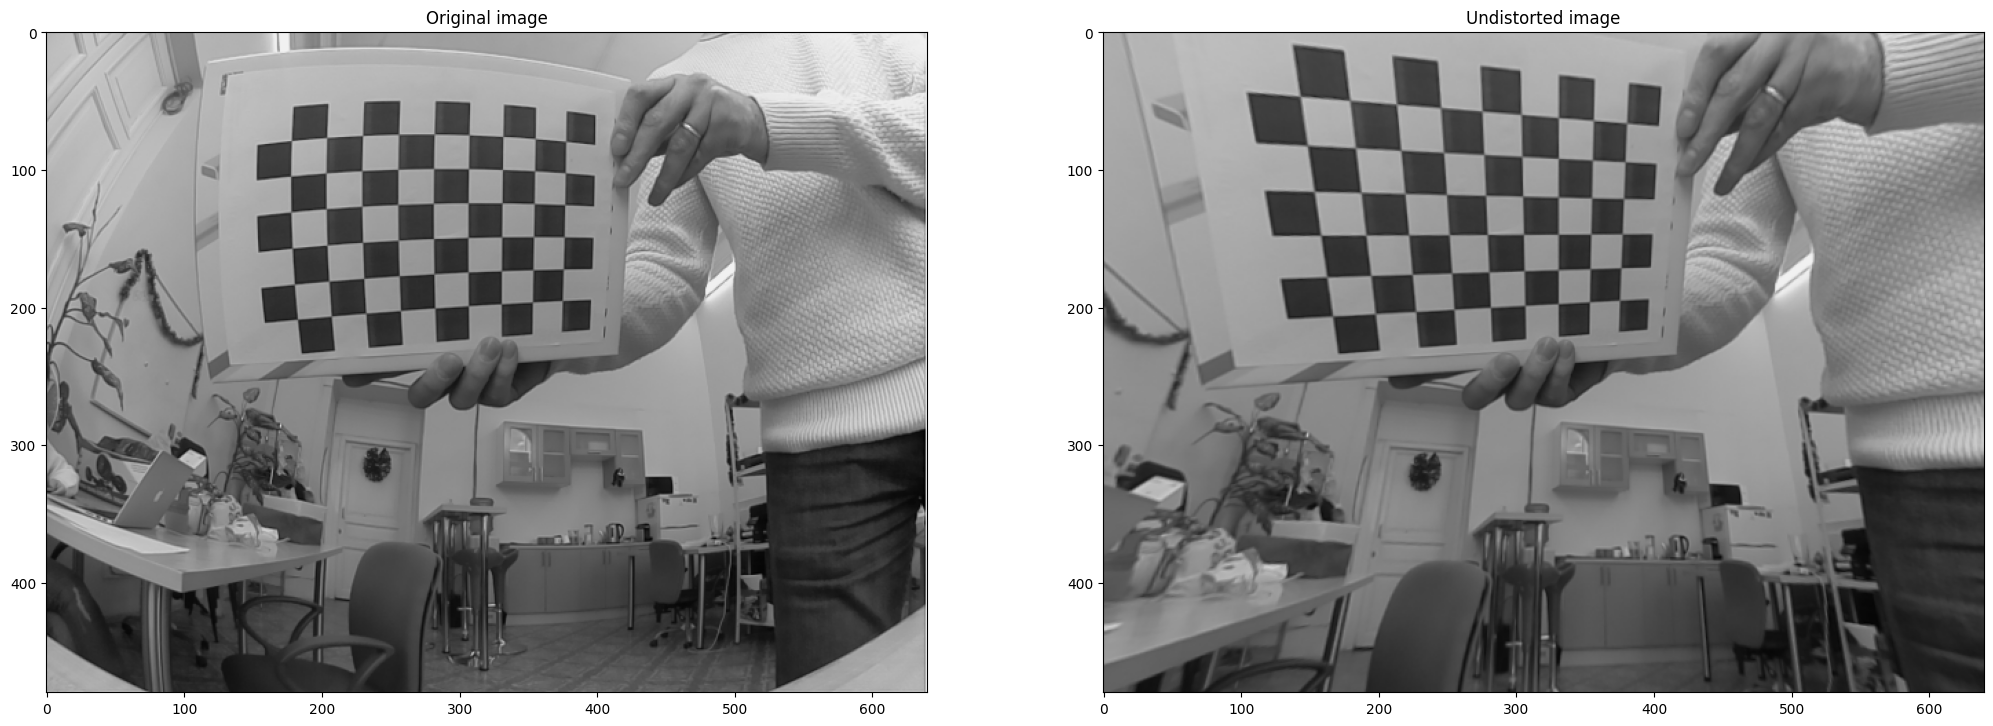

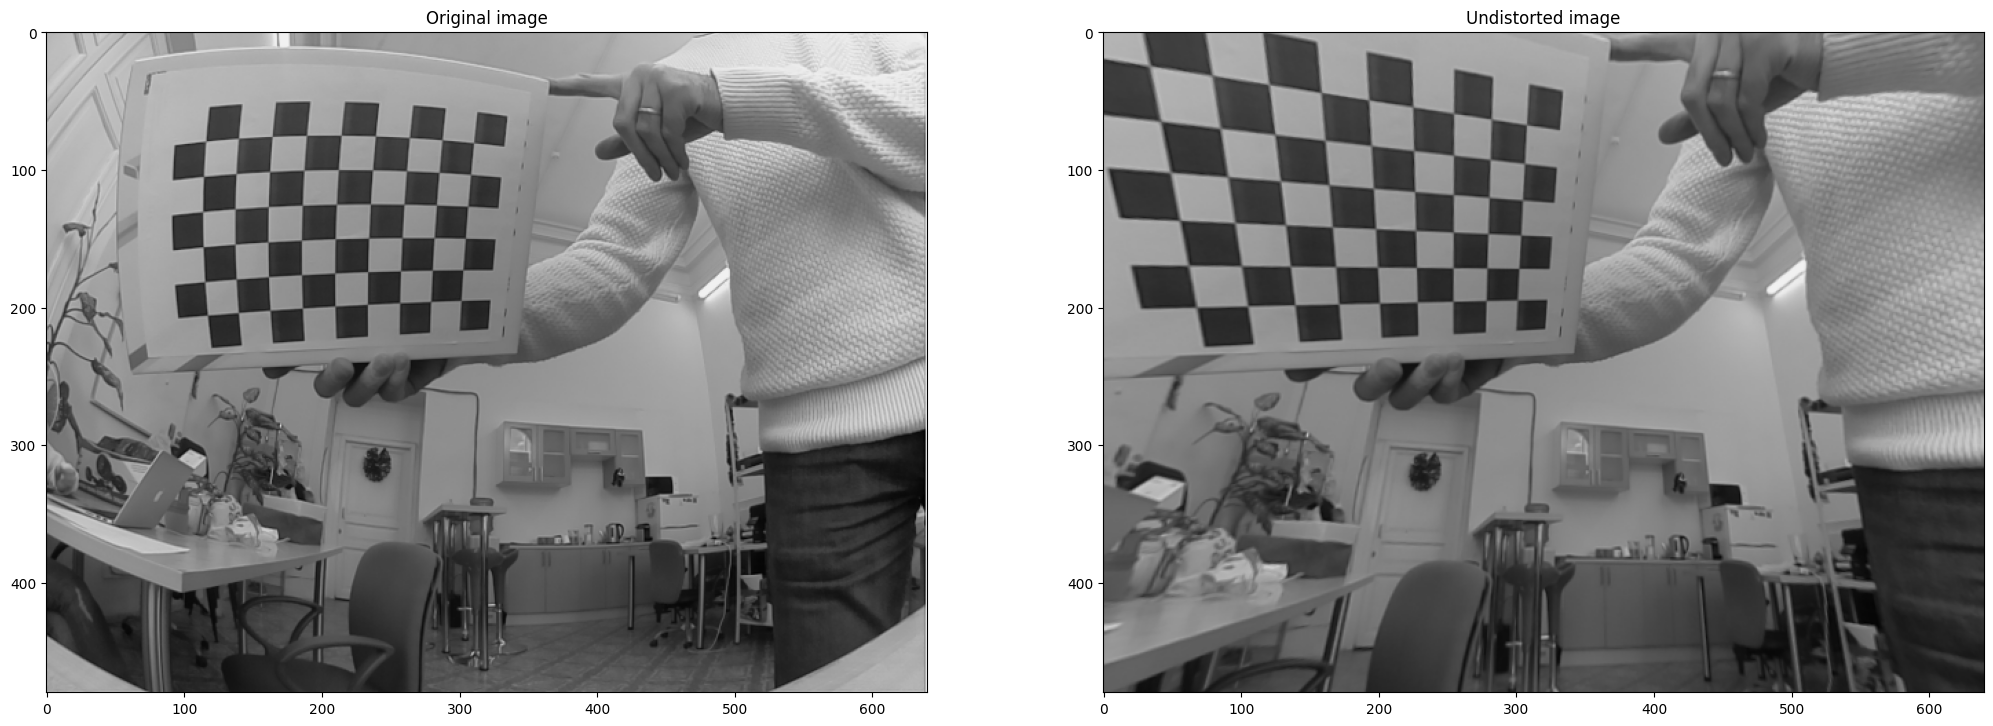

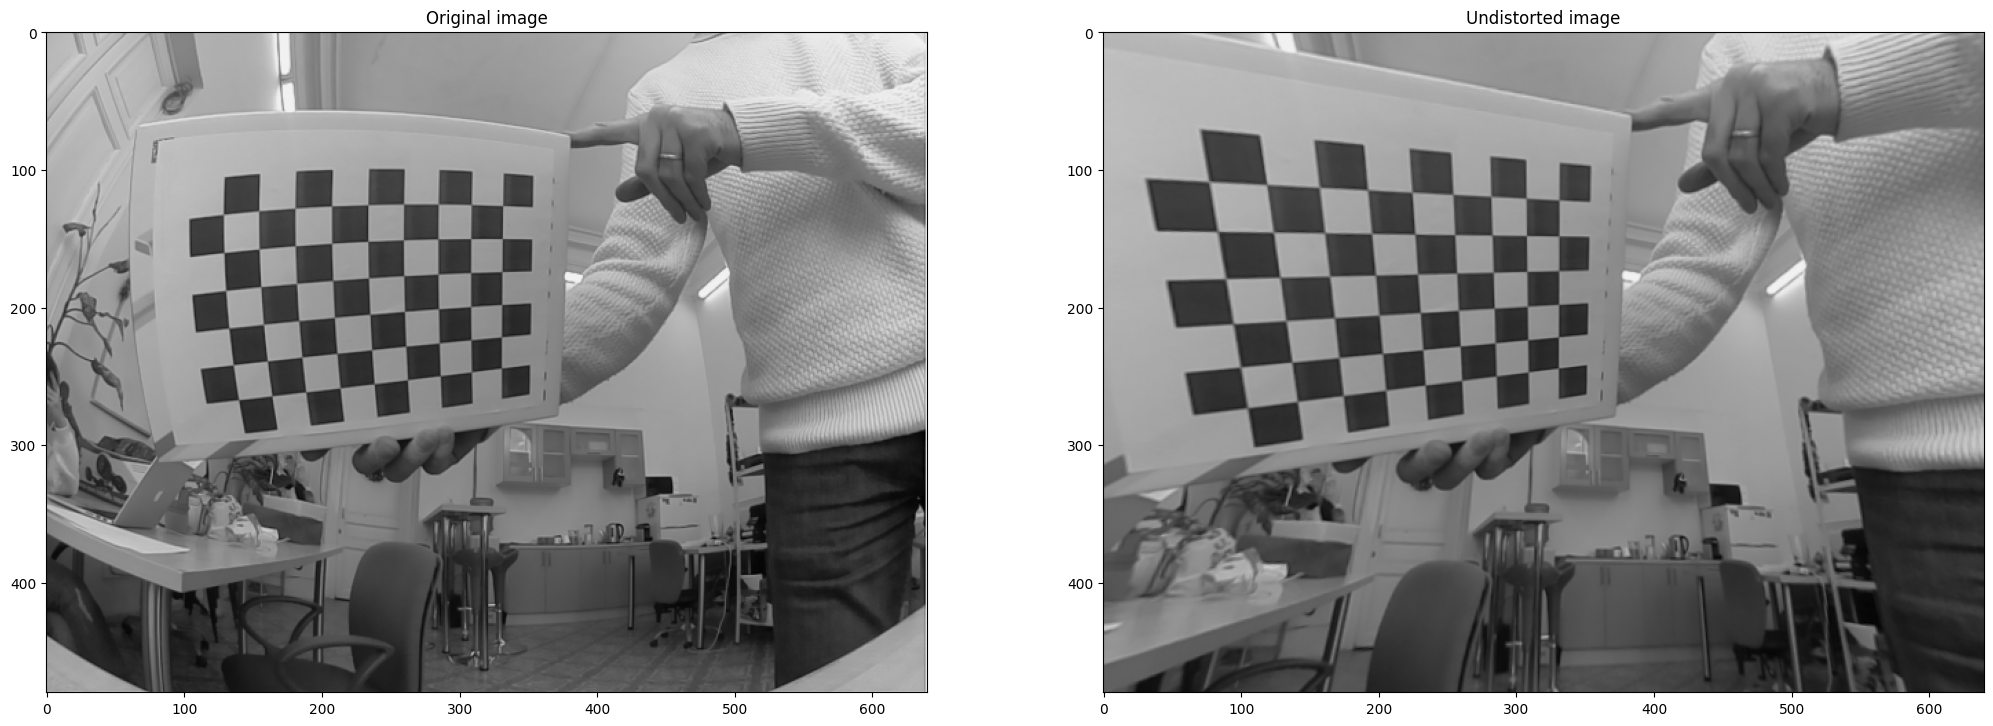

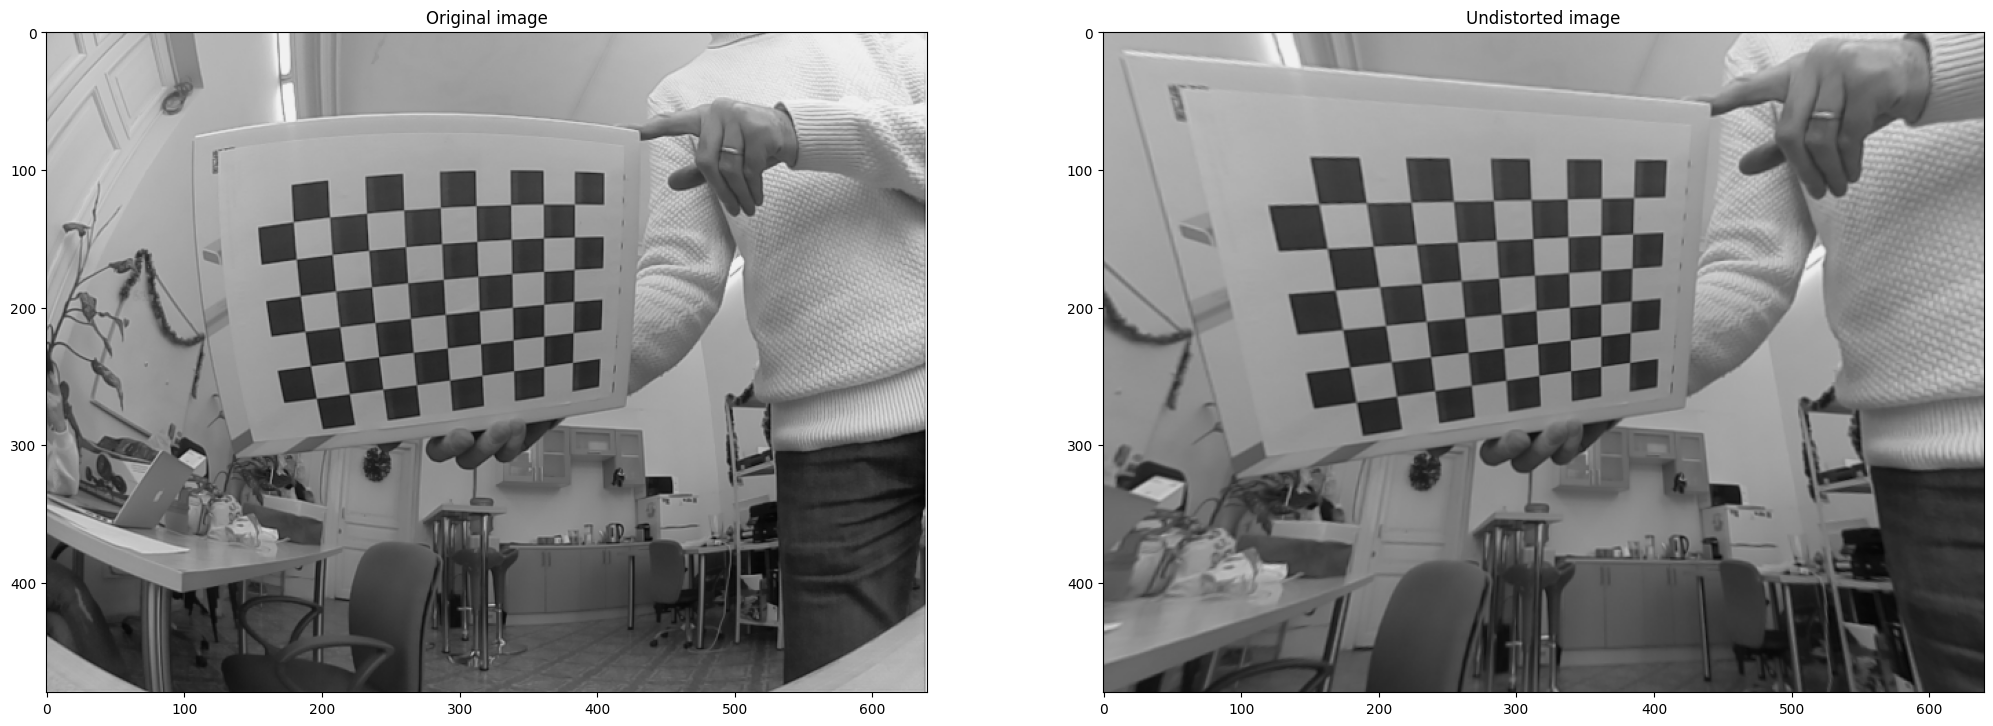

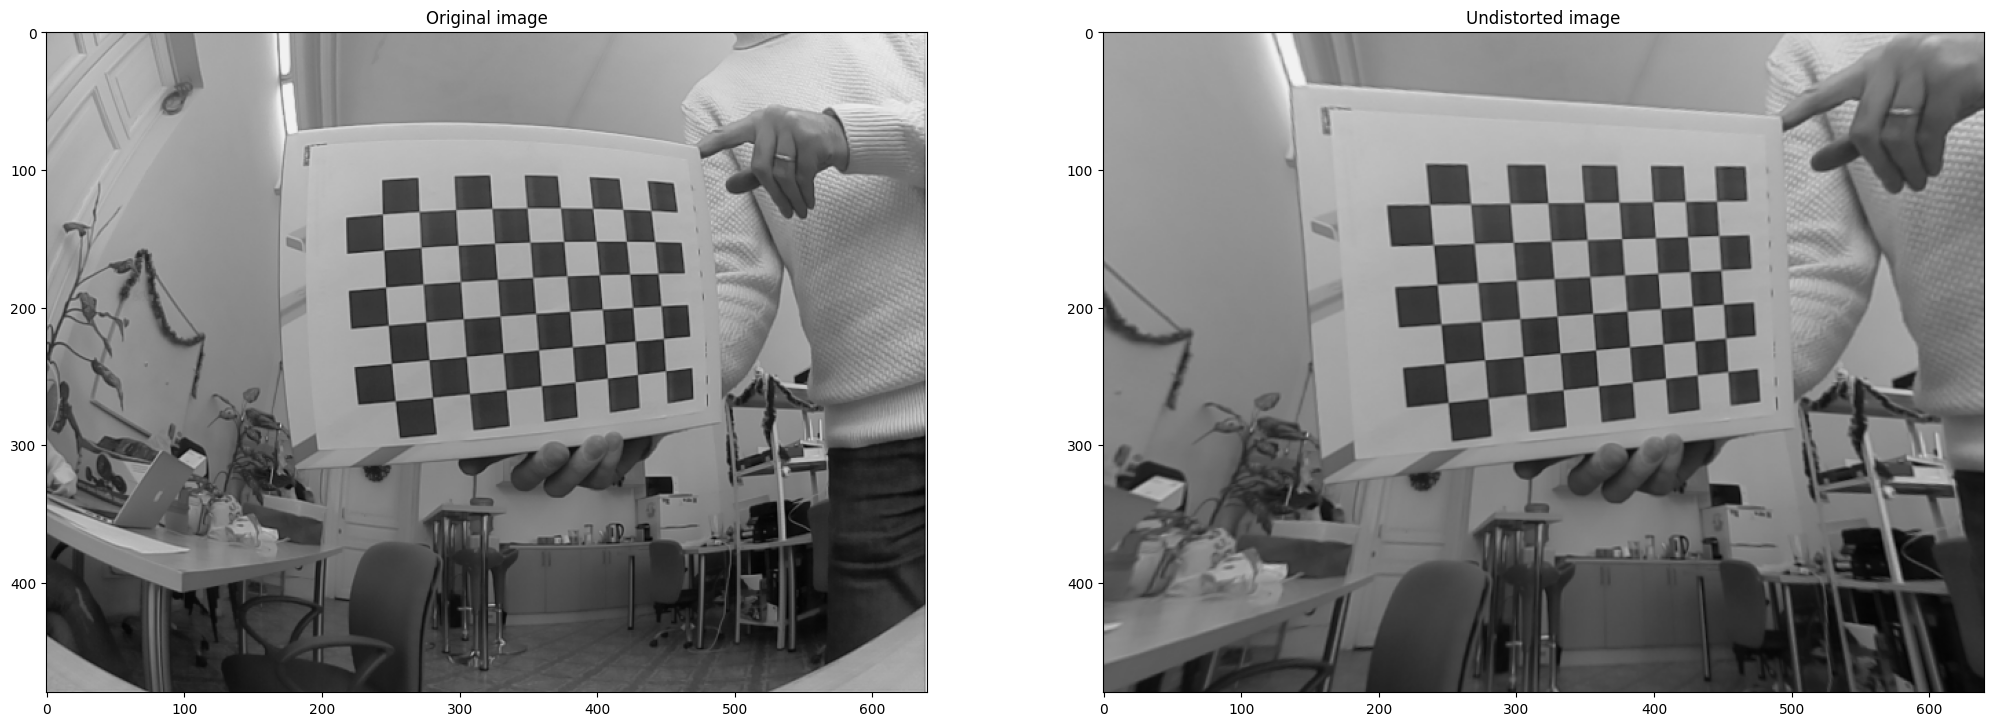

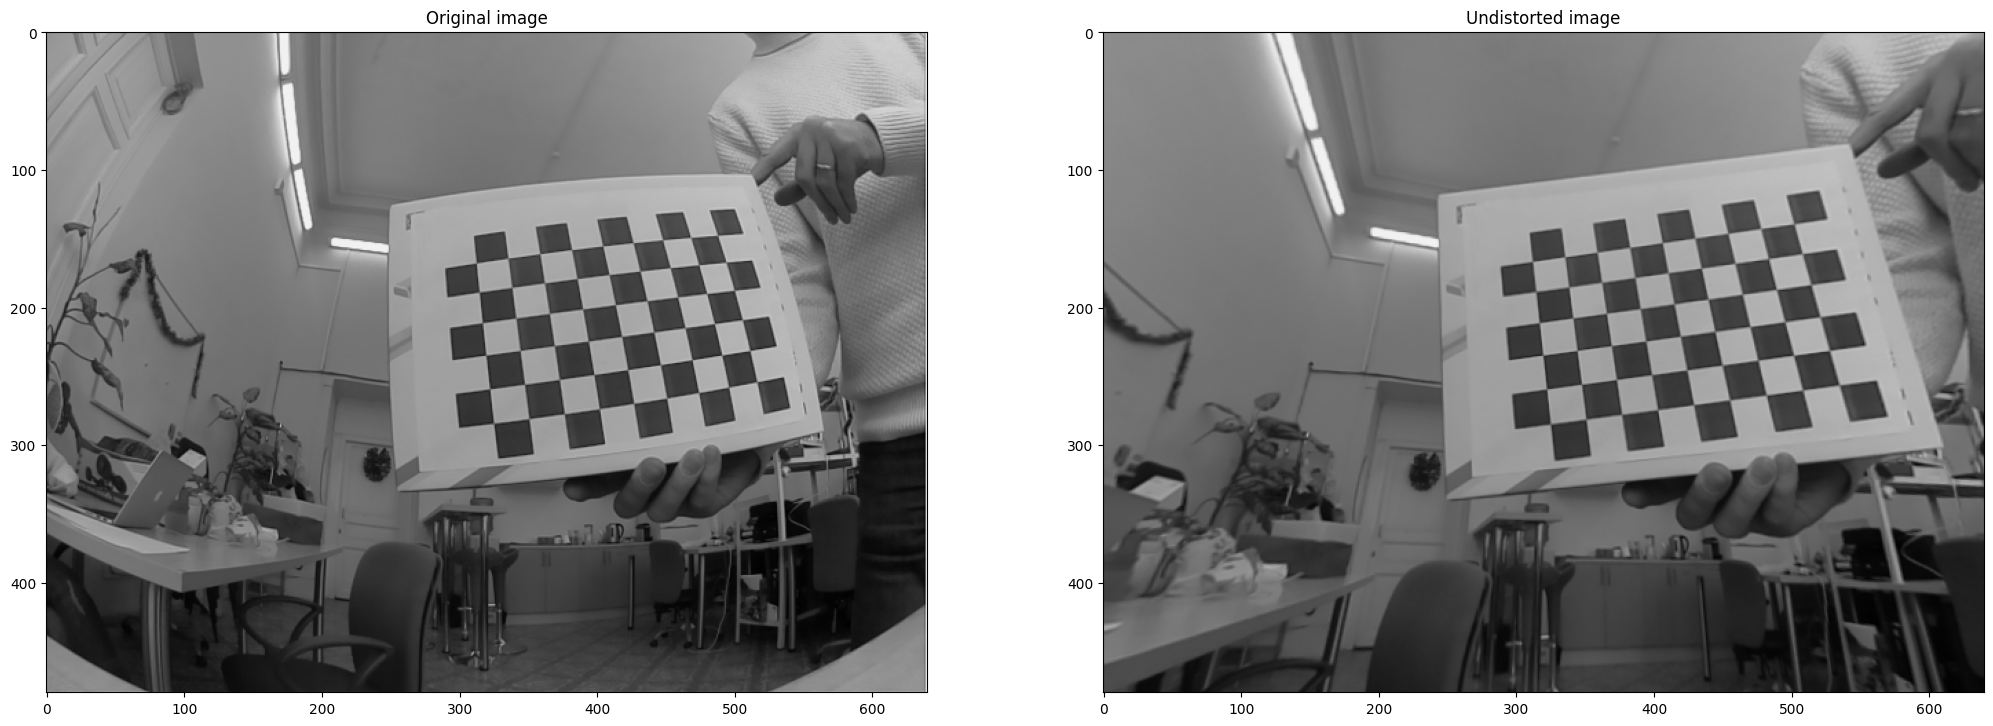

In [6]:
number_of_images = 10
for i in range(1, number_of_images):
    img = cv2.imread(image_dir + "left_%02d.png" % i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (width, height),cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

    Y, X, channels = img.shape
    # If found, add object points, image points (after refining them)
    if ret:
        minRx = corners[:, :, 0].min()
        maxRx = corners[:, :, 0].max()
        minRy = corners[:, :, 1].min()
        maxRy = corners[:, :, 1].max()

        border_threshold_x = X/12
        border_threshold_y = Y/12

        x_thresh_bad = False
        if minRx < border_threshold_x or maxRx > X - border_threshold_x:
            x_thresh_bad = True

        y_thresh_bad = False
        if minRy < border_threshold_y or maxRy > Y - border_threshold_y:
            y_thresh_bad = True

        if x_thresh_bad or y_thresh_bad:
            continue
        
    if ret:
      objpoints.append(objp)
      corners2 = cv2.cornerSubPix(gray, corners, (3, 3), (-1, -1), criteria)
      imgpoints.append(corners2)

      # undistort the image
      undistorted_image = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

      plt.figure(figsize=(25, 12))
      plt.subplot(1, 2, 1)
      plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      plt.title("Original image")
      plt.subplot(1, 2, 2)
      plt.imshow(cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB))
      plt.title("Undistorted image")
      plt.show()
    else:
      print("Could not find corners in image %d" % i)
      continue

cv2.destroyAllWindows()

### 5.2 Kalibracja układu kamer

In [7]:
i = 1
l = cv2.imread(image_dir + "left_%02d.png" % i)
r = cv2.imread(image_dir + "right_%02d.png" % i)

imgpointsleft = []
imgpointsright = []
objpoints = []
number_of_images = 50

for i in range(1, number_of_images):
  img_left = cv2.imread(image_dir + "left_%02d.png" % i)
  img_right = cv2.imread(image_dir + "right_%02d.png" % i)

  gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
  gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

  # Find the chess board corners
  ret_left, corners_left = cv2.findChessboardCorners(gray_left, (width, height),cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
  ret_right, corners_right = cv2.findChessboardCorners(gray_right, (width, height),cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

  Y, X, channels = img_left.shape
  # If found, add object points, image points (after refining them)

  if ret_left:
      minRx = corners_left[:, :, 0].min()
      maxRx = corners_left[:, :, 0].max()
      minRy = corners_left[:, :, 1].min()
      maxRy = corners_left[:, :, 1].max()

      border_threshold_x = X/12
      border_threshold_y = Y/12

      x_thresh_bad = False
      if minRx < border_threshold_x or maxRx > X - border_threshold_x:
          x_thresh_bad = True

      y_thresh_bad = False
      if minRy < border_threshold_y or maxRy > Y - border_threshold_y:
          y_thresh_bad = True

      if x_thresh_bad or y_thresh_bad:
          continue
    
  if ret_right:
      minRx = corners_right[:, :, 0].min()
      maxRx = corners_right[:, :, 0].max()
      minRy = corners_right[:, :, 1].min()
      maxRy = corners_right[:, :, 1].max()

      border_threshold_x = X/12
      border_threshold_y = Y/12

      x_thresh_bad = False
      if minRx < border_threshold_x or maxRx > X - border_threshold_x:
          x_thresh_bad = True

      y_thresh_bad = False
      if minRy < border_threshold_y or maxRy > Y - border_threshold_y:
          y_thresh_bad = True

      if x_thresh_bad or y_thresh_bad:
          continue

  if ret_left and ret_right:
    objpoints.append(objp)
    corners_left = cv2.cornerSubPix(gray_left, corners_left, (3, 3), (-1, -1), criteria)
    corners_right = cv2.cornerSubPix(gray_right, corners_right, (3, 3), (-1, -1), criteria)
    imgpointsleft.append(corners_left)
    imgpointsright.append(corners_right)

    # Draw and display the corners
    cv2.drawChessboardCorners(img_left, (width, height), corners_left, ret_left)
    cv2.drawChessboardCorners(img_right, (width, height), corners_right, ret_right)
    cv2.imshow('Corners left', img_left)
    cv2.imshow('Corners right', img_right)
    cv2.waitKey(100)

cv2.destroyAllWindows()

In [8]:
len(imgpointsleft), len(imgpointsright), len(objpoints)

(38, 38, 38)

In [9]:
N_OK = len(objpoints)
K_left = np.zeros((3, 3))
D_left = np.zeros((4, 1))
K_right = np.zeros((3, 3))
D_right = np.zeros((4, 1))
rvecs_left = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
tvecs_left = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
rvecs_right = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
tvecs_right = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]

ret ,K_left, D_left, rvecs_left, tvecs_left = cv2.fisheye.calibrate(
    objpoints,
    imgpointsleft,
    image_size,
    K_left,
    D_left,
    rvecs_left,
    tvecs_left,
    calibration_flags,
    (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6)
)

ret ,K_right, D_right, rvecs_right, tvecs_right = cv2.fisheye.calibrate(
    objpoints,
    imgpointsright,
    image_size,
    K_right,
    D_right,
    rvecs_right,
    tvecs_right,
    calibration_flags,
    (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6)
)

In [13]:
imgpointsleft = np.asarray(imgpointsleft, dtype=np.float64)
imgpointsright = np.asarray(imgpointsright, dtype=np.float64)
objpoints = np.asarray(objpoints, dtype = np.float64)

(RMS, _ , _, _, _, _ , _, rotation_matrix, translation_vector) = cv2.fisheye.stereoCalibrate(
    objpoints,
    imgpointsleft,
    imgpointsright,
    K_left,
    D_left,
    K_right,
    D_right,
    image_size,
    None,
    None,
    flags = cv2.fisheye.CALIB_FIX_INTRINSIC,
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01)
)




In [14]:
R2 = np.zeros((3, 3))
P1 = np.zeros((3, 4))
P2 = np.zeros((3, 4))
Q = np.zeros((4, 4))

#rectify calibration results
(leftRectification, rightRectification, leftProjection, rightProjection, dispartityToDepthMap) = cv2.fisheye.stereoRectify(
    K_left, D_left, K_right, D_right, image_size, rotation_matrix, translation_vector, 0, R2, P1, P2, Q,
    cv2.CALIB_ZERO_DISPARITY, (0, 0), 0,0)

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'stereoRectify'
> Overload resolution failed:
>  - R is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'R'
